<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/wahed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, kstest
from sklearn import datasets as ds
from sklearn import metrics



# Classifiers
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.

## Data loading

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Data loading functions. Uncomment the one you want to use
from worcliver.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)}')
print(f'Feature names: {data.columns}')

# Inspecting the dataset
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

The number of samples: 186
The number of features: 494
Feature names: Index(['label', 'PREDICT_original_sf_compactness_avg_2.5D',
       'PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_rad_dist_avg_2.5D',
       'PREDICT_original_sf_rad_dist_std_2.5D',
       'PREDICT_original_sf_roughness_avg_2.5D',
       'PREDICT_original_sf_roughness_std_2.5D',
       'PREDICT_original_sf_convexity_avg_2.5D',
       'PREDICT_original_sf_convexity_std_2.5D',
       'PREDICT_original_sf_cvar_avg_2.5D',
       ...
       'PREDICT_original_phasef_phasesym_median_WL3_N5',
       'PREDICT_original_phasef_phasesym_std_WL3_N5',
       'PREDICT_original_phasef_phasesym_skewness_WL3_N5',
       'PREDICT_original_phasef_phasesym_kurtosis_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_position_WL3_N5',
       'PREDICT_original_phasef_phasesym_range_WL3_N5',
       'PREDICT_original_phasef_phasesym_energy_WL3_N5',
       'PRE

## Splitting dataset in training set and test set

TEKST TOEVOEGEN

In [ ]:
Y = data['label']
X = data.drop('label', axis=1)



# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in X_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in X_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


**Code voor toediening classifiers**

In [ ]:
clsfs = [LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB(),
         LogisticRegression(),SGDClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]

# Create a label encoder
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(Y_train)

# Apply the fitted encoder to the pandas column
Y_train = le.transform(Y_train)


for clf in clsfs:
    # Fit classifier on training data
    clf.fit(X_train, Y_train)

    # Predict labels on training data
    Y_pred = clf.predict(X_train)

    # Compute the evaluation metrics for each classifier
    auc = metrics.roc_auc_score(Y_train, Y_pred)
    accuracy = metrics.accuracy_score(Y_train, Y_pred)
    F1 = metrics.f1_score(Y_train, Y_pred)
    precision = metrics.precision_score(Y_train, Y_pred)
    recall = metrics.recall_score(Y_train, Y_pred)

    # Print the evaluation metrics
    print(f'Classifier: {clf.__class__.__name__}')
    print(f'AUC: {auc}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {F1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}\n')



Classifier: LinearDiscriminantAnalysis
AUC: 0.9798173515981735
Accuracy: 0.9797297297297297
F1 Score: 0.9798657718120806
Precision: 0.9864864864864865
Recall: 0.9733333333333334

Classifier: QuadraticDiscriminantAnalysis
AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0

Classifier: GaussianNB
AUC: 0.5142465753424658
Accuracy: 0.5202702702702703
F1 Score: 0.6697674418604651
Precision: 0.5142857142857142
Recall: 0.96

Classifier: LogisticRegression
AUC: 0.5142465753424658
Accuracy: 0.5202702702702703

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



F1 Score: 0.6697674418604651
Precision: 0.5142857142857142
Recall: 0.96

Classifier: SGDClassifier
AUC: 0.5275799086757992
Accuracy: 0.5337837837837838
F1 Score: 0.6820276497695853
Precision: 0.5211267605633803
Recall: 0.9866666666666667

Classifier: KNeighborsClassifier
AUC: 0.7159817351598174
Accuracy: 0.7162162162162162
F1 Score: 0.7236842105263158
Precision: 0.7142857142857143
Recall: 0.7333333333333333

Classifier: DecisionTreeClassifier
AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0



## Preprocessing
TEKST INSERTEN

### Handling missing data

In [ ]:
# Checking on missing values per feature
for column in X_train.columns:
    missing_values = X_train[column].isnull().sum()
    print(f'Feature{column} contains {missing_values} missing values')

# Checking on missing values per sample
for index, row in X_train.iterrows():
    missing_values = row.isnull().sum()
    print(f'Sample {index} contains {missing_values} missing values')

FeaturePREDICT_original_sf_compactness_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_compactness_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_rad_dist_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_rad_dist_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_roughness_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_roughness_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_convexity_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_convexity_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_cvar_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_cvar_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_prax_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_prax_std_2.5D contains 0 missing values
FeaturePREDICT_original_sf_evar_avg_2.5D contains 0 missing values
FeaturePREDICT_original_sf_evar_std_2.5D contains 0 missing values
FeaturePREDICT_origi

In [ ]:
# Checking on outliers using interquartile range
def define_outliers(feature):
  sorted_feature = np.sort(feature)
  Q1 = np.percentile(feature, 25)
  Q3 = np.percentile(feature, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
  outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
  return outliers, outliers_total_column, lower_bound, upper_bound

# Replacing outliers with the lower or upper bound
def replace_outliers(feature):
  feature = feature.copy()
  outliers, outliers_total_column, lower_bound, upper_bound = define_outliers(feature)
  if outliers_total_column > 0:
    feature[feature < lower_bound] = lower_bound # Ik denk dat het beter op zo'n sorot manier kan, maar t lukt me ff niet:  feature.loc[feature < lower_bound] = lower_bound
    feature[feature > upper_bound] = upper_bound
  return feature

# Performing the above functions on the train set
outliers_total = 0
for column in X_train.columns:
  outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
  outliers_total += outliers_total_column
  feature = replace_outliers(X_train[column])
  print(f'There are {outliers_total_column} outliers in {column}')
  print(f'Outliers in column {column}: {outliers.tolist()}')

print(f'In total there are {outliers_total} outliers which have been replaced')

There are 7 outliers in PREDICT_original_sf_compactness_avg_2.5D
Outliers in column PREDICT_original_sf_compactness_avg_2.5D: [0.6317957022519809, 0.6070875925268792, 0.6064436605925971, 0.5490461185660104, 0.5543192712911014, 0.6155506203034459, 0.6368209229786063]
There are 14 outliers in PREDICT_original_sf_compactness_std_2.5D
Outliers in column PREDICT_original_sf_compactness_std_2.5D: [0.1785375591834449, 0.1754730112411291, 0.1846326352463202, 0.2146155010484771, 0.2186608678676284, 0.1607441194156164, 0.2306197579134532, 0.163227270446966, 0.1804186643939801, 0.2302757341427226, 0.1558977821299366, 0.2457691147651202, 0.1649957169927587, 0.2448132675933574]
There are 4 outliers in PREDICT_original_sf_rad_dist_avg_2.5D
Outliers in column PREDICT_original_sf_rad_dist_avg_2.5D: [73.24709355647035, 70.9931599905395, 69.11177300511882, 73.61003153504791]
There are 6 outliers in PREDICT_original_sf_rad_dist_std_2.5D
Outliers in column PREDICT_original_sf_rad_dist_std_2.5D: [13.264496



```
# Dit is opgemaakt als code
```

Scalen van de data

In [ ]:
## Kijken of data normaal verdeeld is




# Select only the numeric columns in the DataFrame
# numeric_cols = data.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis of the numeric data
# skewness = numeric_cols.apply(lambda x: skew(x.dropna()))
# kurtosis = numeric_cols.apply(lambda x: kurtosis(x.dropna()))

# Print skewness and kurtosis
# print(f"Skewness:\\n{skewness}")
# print(f"\\nKurtosis:\\n{kurtosis}")

# Plot histograms and probability density function (PDF) for each numeric column
#for column in numeric_cols.columns:
#    plt.figure(figsize=(12,6))
#    seaborn.distplot(numeric_cols[column].dropna(), fit=norm, kde=False)
#   plt.title(f"Histogram and PDF for {column}")
#   plt.show()

Y = data['label']
X = data.drop('label', axis=1)


p_values = {}
for key,values in X.items():


  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
for key, p_value in p_values.items():
    print(f"{key}: {p_value}")








PREDICT_original_sf_compactness_avg_2.5D: 1.2884966633722061e-95
PREDICT_original_sf_compactness_std_2.5D: 7.149949112630159e-44
PREDICT_original_sf_rad_dist_avg_2.5D: 0.0
PREDICT_original_sf_rad_dist_std_2.5D: 1.027732133507282e-195
PREDICT_original_sf_roughness_avg_2.5D: 0.0
PREDICT_original_sf_roughness_std_2.5D: 1.5356650443185613e-138
PREDICT_original_sf_convexity_avg_2.5D: 3.497901965579489e-125
PREDICT_original_sf_convexity_std_2.5D: 8.70433106156506e-44
PREDICT_original_sf_cvar_avg_2.5D: 4.747546724956185e-44
PREDICT_original_sf_cvar_std_2.5D: 1.1465722035154619e-43
PREDICT_original_sf_prax_avg_2.5D: 3.258199381639709e-63
PREDICT_original_sf_prax_std_2.5D: 2.5175605458726742e-45
PREDICT_original_sf_evar_avg_2.5D: 4.3939318950203334e-44
PREDICT_original_sf_evar_std_2.5D: 1.0424104899005992e-43
PREDICT_original_sf_solidity_avg_2.5D: 5.711654069425168e-149
PREDICT_original_sf_solidity_std_2.5D: 1.287474706820734e-43
PREDICT_original_sf_area_avg_2.5D: 0.0
PREDICT_original_sf_area_m

In [ ]:
# Scalen met normalized scaler. Features zijn meestal niet normaal verdeeld.

scaler = preprocessing.Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# perform PCA. Is wel handiger omdat we zoveel features hebben. Wellicht straks
# lasso regression gebruiken voor onbelangrijke features.

pca = decomposition.PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)






Feature importance bepalen

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that 'data' is your DataFrame and it has been loaded correctly

# Create the feature matrix 'X' and target variable 'Y'
X = data.drop('label', axis=1)
Y = data['label']

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=100)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 43 (0.024008)
2. feature 381 (0.014408)
3. feature 61 (0.012975)
4. feature 80 (0.012497)
5. feature 18 (0.012399)
6. feature 95 (0.012112)
7. feature 440 (0.010887)
8. feature 69 (0.010477)
9. feature 107 (0.010142)
10. feature 342 (0.009537)
11. feature 35 (0.009401)
12. feature 74 (0.008906)
13. feature 81 (0.008291)
14. feature 303 (0.008237)
15. feature 48 (0.008234)
16. feature 68 (0.007563)
17. feature 316 (0.007434)
18. feature 28 (0.007420)
19. feature 298 (0.006924)
20. feature 78 (0.006782)
21. feature 40 (0.006636)
22. feature 91 (0.006439)
23. feature 317 (0.006326)
24. feature 458 (0.006093)
25. feature 50 (0.006086)
26. feature 476 (0.005973)
27. feature 352 (0.005946)
28. feature 100 (0.005935)
29. feature 395 (0.005914)
30. feature 277 (0.005848)
31. feature 339 (0.005828)
32. feature 408 (0.005821)
33. feature 104 (0.005780)
34. feature 54 (0.005657)
35. feature 33 (0.005650)
36. feature 399 (0.005645)
37. feature 41 (0.005500)
38. feature 

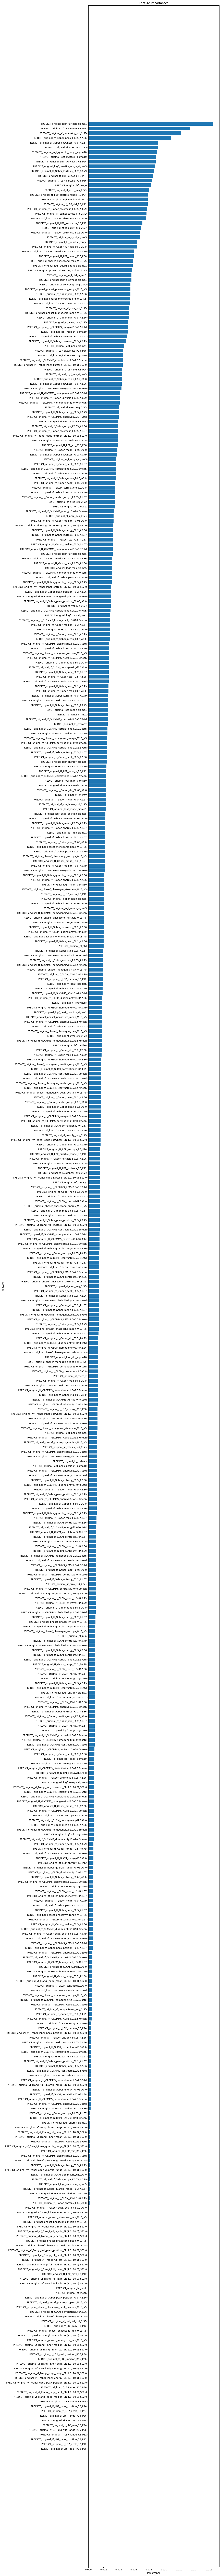

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that 'data' is your DataFrame and it has been loaded correctly

# Create the feature matrix 'X' and target variable 'Y'
X = data.drop('label', axis=1)
Y = data['label']

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(X, Y)

# Get feature importances
importances = clf.feature_importances_


# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, len(importances_df) * 0.4))  # Adjust the figure size
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.yticks(fontsize=10)  # Adjust the font size
plt.show()


